>  # **SMS OR EMAIL SPAM CLASSIICATION BY USING NLP**

![SPAM](https://camo.githubusercontent.com/231fa52b44adb8e718956a5a3425466a1ceb9c9c234df22fba77f0410b4b30e0/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f313430302f302a6d624642506350554a442d35337633682e706e67)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [ ]:
df = pd.read_csv('//kaggle//input//sms-spam-collection-dataset//spam.csv',encoding='latin-1')

In [ ]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2595,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,NaN,NaN,NaN
955,ham,Sorry i now then c ur msg... Yar lor so poor t...,NaN,NaN,NaN
1543,spam,Hello from Orange. For 1 month's free access t...,NaN,NaN,NaN
2427,ham,Do you think i can move &lt;#&gt; in a week,NaN,NaN,NaN
1347,ham,She doesnt need any test.,NaN,NaN,NaN
4541,spam,FreeMsg Hi baby wow just got a new cam moby. W...,NaN,NaN,NaN
3895,spam,tells u 2 call 09066358152 to claim å£5000 pri...,NaN,NaN,NaN
3640,spam,You can stop further club tones by replying \S...,"PO Box 1146 MK45 2WT (2/3)""",NaN,NaN
2384,ham,"Sorry, I'll call later",NaN,NaN,NaN
883,ham,Dude we should go sup again,NaN,NaN,NaN


# **1. Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#Columns (Unnamed: 2, Unnamed: 3, Unnamed: 4) have so much null value so we are going to drop these columns

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [ ]:
df.sample(3)

,v1,v2
240,ham,Tomarrow final hearing on my laptop case so i ...
2095,ham,"Probably, want to pick up more?"
3823,ham,I miss you so much I'm so desparate I have rec...


In [ ]:
#Renaming the columns...
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
1668,ham,"Yes..but they said its IT.,"
1640,ham,"Alright, we're all set here, text the man"
4826,ham,Yup but it's not giving me problems now so may...
4726,spam,Had your mobile 10 mths? Update to the latest ...
5086,ham,Omg if its not one thing its another. My cat h...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
#Checking for misssing values...
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#checking for duplicate...
df.duplicated().sum()

403

In [ ]:
#Removing Duplicates.......
df = df.drop_duplicates(keep='first')

# **2. EDA And Feature Enge...**

In [ ]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [ ]:
#Data is imbalanced so we have to take care of this

In [ ]:
from matplotlib import pyplot as plt

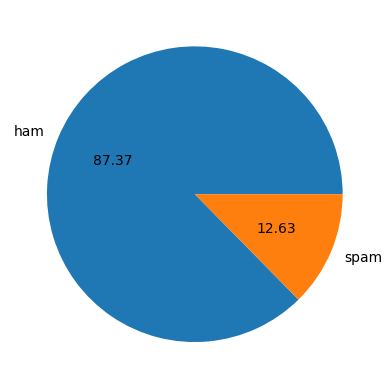

In [ ]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Creating new Feature (num_of_Character)

In [ ]:
df['num_of_character'] = df['text'].apply(len)

In [ ]:
#Creating new feature (num of words)

In [ ]:
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
#Creating new feature (num_sentences)

In [ ]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df[['num_of_character','num_word','num_sentence']].describe()

,num_of_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
#Analysis where target == 0 i.e. ham......
df[df['target'] == 0][['num_of_character','num_word','num_sentence']].describe()

,num_of_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


### As we see by above result ham sms is when....
* mean(num_of_character) is approx 70
* mean(num_word) is approx 16
* mean(num_sentence) is approx 2

In [ ]:
#Analysis where target == 1 i.e. spam...
df[df['target'] == 1][['num_of_character','num_word','num_sentence']].describe()

,num_of_character,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


### As we see by above result spam sms is when....
* mean(num_of_character) is greater than 100
* mean(num_word) is greater than 20
* mean(num_sentence) is approx 2

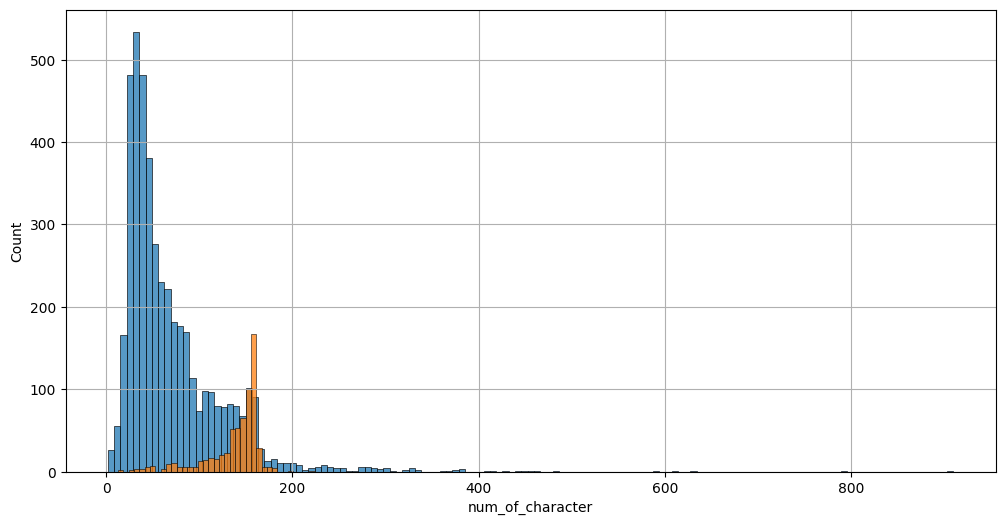

In [ ]:
#Now see these conclusions by graphically
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_character'])
sns.histplot(df[df['target'] == 1]['num_of_character'])
plt.grid()

> As we see by graphicaly taget is depend on column (num_of_character)

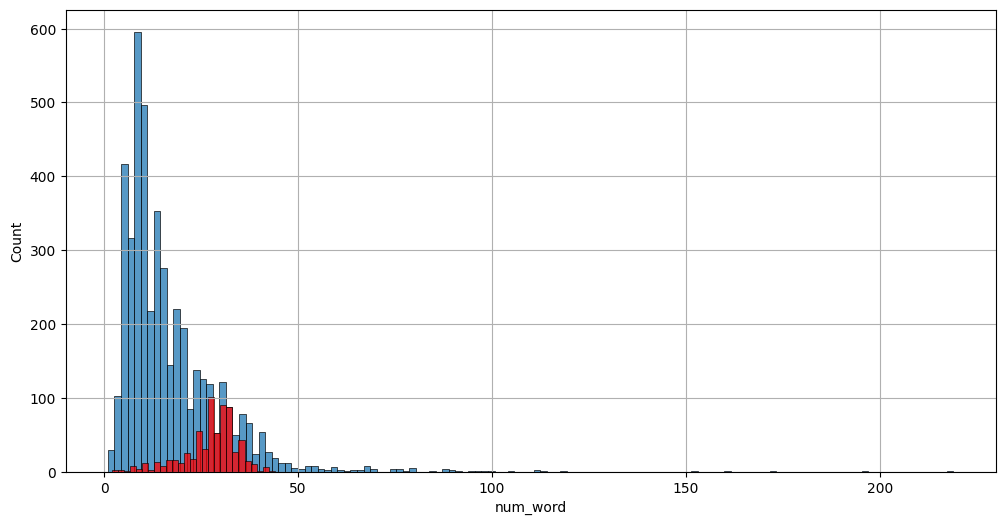

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_word'])
sns.histplot(df[df['target'] == 1]['num_word'],color='red')
plt.grid()

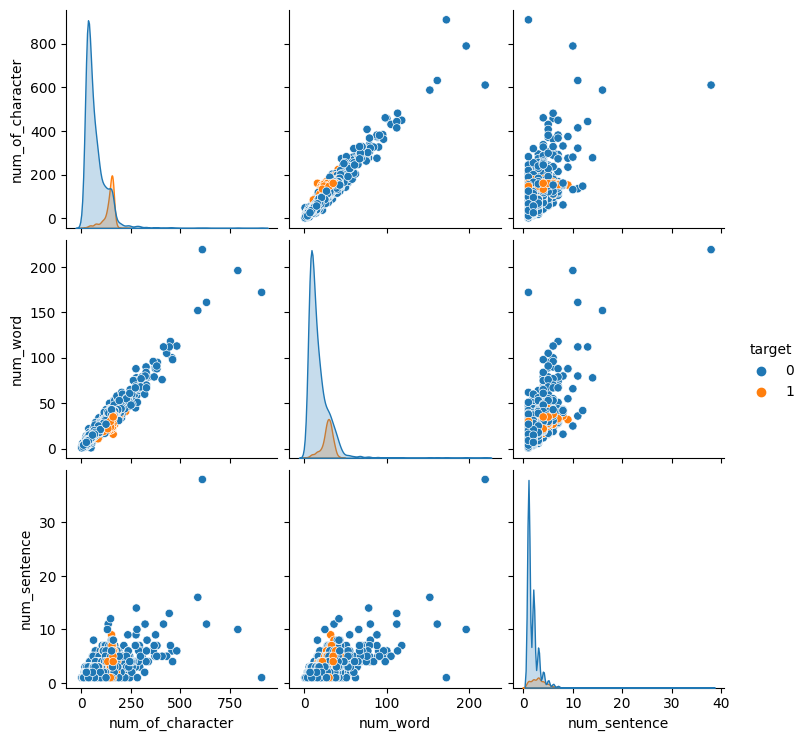

In [ ]:
sns.pairplot(df,hue='target')
plt.grid()

<Axes: >

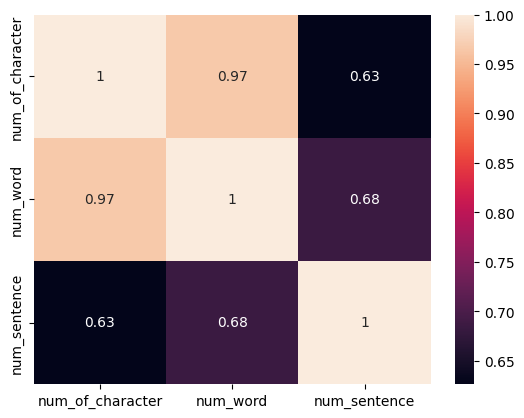

In [ ]:
sns.heatmap(df[['num_of_character','num_word','num_sentence']].corr(),annot=True)

# **3. Data Preprocessing**

* Lower Case
* Tokenization
* Removing Special Character
* Removing Stop words and punctuation
* Stemming

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)



In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
#For example how this function work actually...
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head(5)

,target,text,num_of_character,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

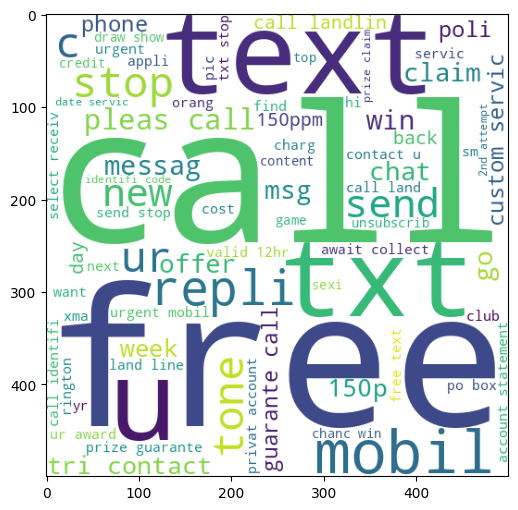

In [ ]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

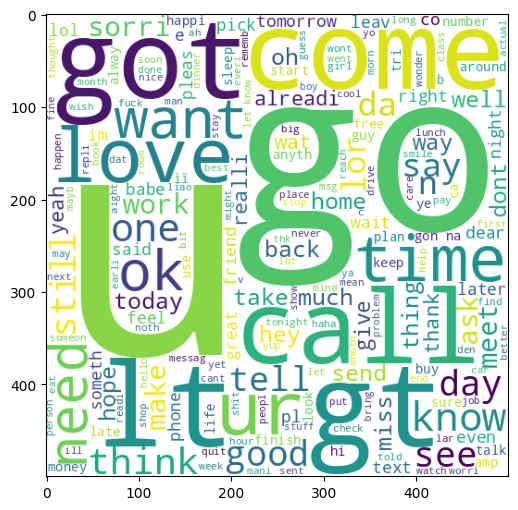

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

# **4. Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 4000)

In [ ]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
x.shape

(5169, 4000)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 20)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB(alpha=1.0)
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8588007736943907
0.5


In [ ]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
1.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9758220502901354
0.9763779527559056


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

# **5. Testing**

In [ ]:
pred = mnb.predict(x_test)

In [ ]:
pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 1, ..., 0, 0, 0])